# Teste Prático para Engenheiro de Dados Júnior

## 1. Análise de dados

In [46]:
# Para fazer análise exploratória dos dados, importo a biblioteca do Pandas
# Para visualizar algumas análises de maneira visual, importo o matplotlib
# E para se conectar ao banco importo a biblioteca sqlalchemy

import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [47]:
# Criando uma variável com o caminho do arquivo sales_data
file_path_sales = "G:\Meu Drive\Case Rox\Teste Pratico Jr\sales_data.xlsx"

# Carregando o arquivo em um DataFrame e renomeando a coluna cliente_id para realiar a segunda etapa do teste
df_sales = pd.read_excel(file_path_sales).rename(columns={'cliente_id': 'client_id'})

# Visualizando as primeiras linhas do dataframe de vendas
df_sales.head()

,order_id,product_name,quantity,unit_price,client_id,order_date
0,1,Produto A,3,25,74,2024-03-01
1,2,Produto B,2,30,36,2024-03-02
2,3,Produto C,1,20,12,2024-03-03
3,4,Produto A,4,25,92,2024-03-04
4,5,Produto D,2,40,55,2024-03-05


In [48]:
# Antes de fazer qualquer análise verifico se há valores nulos no dataset
null_values = df_sales.isnull().sum()
print("Valores nulos por coluna:")
print(null_values)

# verificando os tipos de dados do dataset
data_types = df_sales.dtypes
print("\nTipos de dados por coluna:")
print(data_types)

# Verificando se há duplicidade na coluna order_id
duplicated_order_id = df_sales.duplicated(subset=['order_id']).sum()
if duplicated_order_id > 0:
    print("\nExistem", duplicated_order_id, "id's duplicados.")
else:
    print("\nNão há id's duplicados.")

Valores nulos por coluna:
order_id        0
product_name    0
quantity        0
unit_price      0
client_id       0
order_date      0
dtype: int64

Tipos de dados por coluna:
order_id                 int64
product_name            object
quantity                 int64
unit_price               int64
client_id                int64
order_date      datetime64[ns]
dtype: object

Não há id's duplicados.


In [49]:
# Para saber o período de registro de vendas, resolvi verificar a primeira data registrada de vendas e a última

# Encontrando a primeira e a última data de venda
first_sale_date = df_sales['order_date'].min()
last_sale_date = df_sales['order_date'].max()
print("Primeira data de venda:", first_sale_date)
print("Última data de venda:", last_sale_date)

Primeira data de venda: 2024-03-01 00:00:00
Última data de venda: 2024-06-08 00:00:00


In [50]:
# Para fazer algumas analises sem possíveis falhas, pensei em padronizar o nome dos produtos e calcular a quantidade total vendida por produto,
# a quantidade total de todos os produtos vendidos, a média vendida por produto e a média total de todos os produtos vendidos;
# E também resolvi analisar a quantidade de produtos vendidos ao longos dos meses e a participação percentual do produto no total do mês

# Padronizando os nomes dos produtos para maiúsculo
df_sales['product_name'] = df_sales['product_name'].str.upper()

# Calculando a quantidade total vendida por produto e agrupando por produto
product_totals = df_sales.groupby('product_name')['quantity'].sum()
print("Quantidade total de cada produto vendido:")
print(product_totals)

Quantidade total de cada produto vendido:
product_name
PRODUTO A    61
PRODUTO B    60
PRODUTO C    60
PRODUTO D    53
Name: quantity, dtype: int64


In [51]:
# Calculando a quantidade total de todos os produtos vendidos
total_products_sold = product_totals.sum()
print("Quantidade total de produtos vendidos:", total_products_sold)

Quantidade total de produtos vendidos: 234


In [52]:
# Calculando a média de vendas por dia, agrupando pelo prduto, e limitando que os valores tenham mais que duas casas decimais
average_quantities_per_product = df_sales.groupby('product_name')['quantity'].mean().round(2)
print("Média de quantidade por produto vendido:")
for product, average_quantity in average_quantities_per_product.items():
    print(f"A média do {product} é de: {average_quantity}")

# Calculando a média total vendida por dia
average_total_products_sold = round(df_sales['quantity'].mean(), 2)
print("Média do total de produtos vendidos:", average_total_products_sold)

Média de quantidade por produto vendido:
A média do PRODUTO A é de: 2.35
A média do PRODUTO B é de: 2.4
A média do PRODUTO C é de: 2.4
A média do PRODUTO D é de: 2.21
Média do total de produtos vendidos: 2.34


In [53]:
# Extraindo o mês da data das vendas
df_sales['month'] = df_sales['order_date'].dt.to_period('M')

# Calculando a quantidade total vendida por produto e por mês: Aqui uso o método unstack para trasnformar o resultado do agrupamento para 
# um DF onde o índice principal é month e as colunas são os product_name.

monthly_product_sales = df_sales.groupby(['month', 'product_name'])['quantity'].sum().unstack()
print("Quantidade total vendida por produto e por mês:")
print(monthly_product_sales)

# Calculando a quantidade total de produtos vendidos por mês
monthly_total_sales = df_sales.groupby('month')['quantity'].sum()

print("\nQuantidade total de produtos vendidos por mês:")
print(monthly_total_sales)

Quantidade total vendida por produto e por mês:
product_name  PRODUTO A  PRODUTO B  PRODUTO C  PRODUTO D
month                                                   
2024-03              22         18         16         16
2024-04              15         18         20         17
2024-05              21         18         18         16
2024-06               3          6          6          4

Quantidade total de produtos vendidos por mês:
month
2024-03    72
2024-04    70
2024-05    73
2024-06    19
Freq: M, Name: quantity, dtype: int64


In [54]:
# Calculando o percentual que cada produto representou na venda total do mês
monthly_product_sales_percentage = (monthly_product_sales.div(monthly_total_sales, axis=0) * 100).round(2)

print("\nPercentual de cada produto na venda total do mês:")
print(monthly_product_sales_percentage)

# Calculando o percentual que cada produto representou no total de vendas de todos os meses
total_product_sales_percentage = (product_totals / total_products_sold * 100).round(2)

print("\nPercentual de cada produto no total de vendas de todos os meses:")
print(total_product_sales_percentage)


Percentual de cada produto na venda total do mês:
product_name  PRODUTO A  PRODUTO B  PRODUTO C  PRODUTO D
month                                                   
2024-03           30.56      25.00      22.22      22.22
2024-04           21.43      25.71      28.57      24.29
2024-05           28.77      24.66      24.66      21.92
2024-06           15.79      31.58      31.58      21.05

Percentual de cada produto no total de vendas de todos os meses:
product_name
PRODUTO A    26.07
PRODUTO B    25.64
PRODUTO C    25.64
PRODUTO D    22.65
Name: quantity, dtype: float64


In [55]:
# Após visualizar o ranking de vendas, resolvi calcular o faturamento total por produto e o faturamento total de todos os produtos vendidos

# Calculando o faturamento por linha de venda
df_sales['revenue'] = df_sales['quantity'] * df_sales['unit_price']

# Calculando o faturamento total por produto
product_revenue = df_sales.groupby('product_name')['revenue'].sum().round(2)
print("Faturamento total por produto:")
print(product_revenue)

# Calculando o faturamento total de todos os produtos
total_revenue = product_revenue.sum().round(2)
print("Faturamento total de todos os produtos vendidos:", total_revenue)

# Calculando o faturamento mensal total
monthly_revenue = df_sales.groupby('month')['revenue'].sum().round(2)
print("\nFaturamento mensal total:")
print(monthly_revenue)

# Calculando o faturamento mensal por produto
monthly_product_revenue = df_sales.groupby(['month', 'product_name'])['revenue'].sum().unstack().round(2)
print("\nFaturamento mensal por produto:")
print(monthly_product_revenue)

Faturamento total por produto:
product_name
PRODUTO A    1525
PRODUTO B    1800
PRODUTO C    1200
PRODUTO D    2120
Name: revenue, dtype: int64
Faturamento total de todos os produtos vendidos: 6645

Faturamento mensal total:
month
2024-03    2050
2024-04    1995
2024-05    2065
2024-06     535
Freq: M, Name: revenue, dtype: int64

Faturamento mensal por produto:
product_name  PRODUTO A  PRODUTO B  PRODUTO C  PRODUTO D
month                                                   
2024-03             550        540        320        640
2024-04             375        540        400        680
2024-05             525        540        360        640
2024-06              75        180        120        160


In [56]:
# Calculando o percentual de faturamento de cada produto em relação ao faturamento mensal total: Aqui eu faço a divisão, especificando que 
# a divisão de monthly_product_revenue deve ocorrer com o valor correspondente em monthly_revenue, ao longo do eixo 0, ou seja, das linhas.
monthly_product_revenue_percentage = (monthly_product_revenue.div(monthly_revenue, axis=0) * 100).round(2)
print("\nPercentual de faturamento de cada produto na venda total do mês:")
print(monthly_product_revenue_percentage)

# Calculando o percentual de faturamento de cada produto em relação ao faturamento total de todos os meses
total_product_revenue_percentage = (product_revenue / total_revenue * 100).round(2)
print("\nPercentual de faturamento de cada produto no total de vendas de todos os meses:")
print(total_product_revenue_percentage)


Percentual de faturamento de cada produto na venda total do mês:
product_name  PRODUTO A  PRODUTO B  PRODUTO C  PRODUTO D
month                                                   
2024-03           26.83      26.34      15.61      31.22
2024-04           18.80      27.07      20.05      34.09
2024-05           25.42      26.15      17.43      30.99
2024-06           14.02      33.64      22.43      29.91

Percentual de faturamento de cada produto no total de vendas de todos os meses:
product_name
PRODUTO A    22.95
PRODUTO B    27.09
PRODUTO C    18.06
PRODUTO D    31.90
Name: revenue, dtype: float64


In [57]:
# Resolvi usar o médoto describe para analisar os dados pelo aspecto estatístico

statistical_summary = df_sales[['quantity', 'unit_price']].describe()

# Exibindo o resumo estatístico
print(statistical_summary)

         quantity  unit_price
count  100.000000  100.000000
mean     2.340000   28.600000
std      0.976698    7.353965
min      1.000000   20.000000
25%      2.000000   23.750000
50%      2.000000   25.000000
75%      3.000000   30.000000
max      4.000000   40.000000


###

**Resumo da análise**

* De todos os produtos vendidos no período entre 01/03/2024 e 08/06/2024 , o "Produto A" foi o mais vendido (61 unidades vendidas), representando 26,07% das vendas. O "Produto D" foi o que teve o menor número de vendas (53 unidades vendidas), representando 22,65%;

* O total de produtos vendidos foi de 234 unidades;

* Durante os 4 meses de registro de vendas, em março, o produto que mais vendeu foi o "Produto A" (22 unidades vendidas), representando 30,56% das vendas. Em abril, o "Produto C"(20 unidades vendidas), com 28,57% das vendas. Em maio, o "Produto A" (21 unidades vendidas) novamente com 28,77% das vendas. No último mês o "Produto B" e o "Produto C" foram os que mais venderam, 6 unidades cada, e cada um representou no total das vendas 31,58%;

* O mês que mais teve vendas, foi o mês de maio (73 unidade vendidas);

* Apesar do "Produto A" ter sido o produto mais vendido entre 01/03/2024 e 08/06/2024, o faturamento total desse item foi de $1525 (22,95% do faturamento total), enquanto que o produto menos vendido (Produto D) teve o maior faturamento ($2120 - 31,90% do faturamento total), mostrando que o "Produto D" é o produto com o maior valor agregado;

* Entre 01/03/2024 e 08/06/2024, o faturamento total dos produtos foi de $6645;

* Fazendo uma análise mensal do faturamento, maio foi também o mês com o maior faturamento ($2065);

* Analisando o faturamento mensal dos produtos, março ($640), abril ($680) e maio($640), o "Produto D" foi o que teve maior faturamento. Somente no mês de junho o "Produto B" teve o maior faturamento ($180). Em abril, o "Produto D" teve seu maior faturamento registrado ($680)

**Analise estatística sobre os dados da coluna quantidade**

A média de quantidade vendida por transação é de aproximadamente 2.34 unidades.
O desvio padrão é de cerca de 0.98, indicando que a quantidade vendida varia em torno da média.
O mínimo de quantidade vendida em uma transação é 1 unidade, enquanto o máximo é 4 unidades.
O primeiro quartil (25%) dos dados é 2 unidades, o segundo quartil (mediana, 50%) é 2 unidades e o terceiro quartil (75%) é 3 unidades.

**Análise da coluna preço unitário**

O preço unitário médio dos produtos vendidos é de aproximadamente $28.60.
O desvio padrão dos preços unitários é de cerca de $7.35, o que indica uma certa dispersão nos preços.
O menor preço unitário é $20 e o maior é $40.
O primeiro quartil (25%) dos dados é $23.75, o segundo quartil (mediana, 50%) é $25.00 e o terceiro quartil (75%) é $30.00.


## 2. Transformação de dados

In [58]:
# Criando uma variável com o caminho do arquivo customer_data
file_path_customer = "G:\Meu Drive\Case Rox\Teste Pratico Jr\customer_data.xlsx"

# Carregando o arquivo em um DataFrame
df_customer = pd.read_excel(file_path_customer)

# Visualizando as primeiras linhas do DF
df_customer.head()

,id_cliente,nome,sobrenome,email,telefone,endereço,numero
0,1,João,Silva,joao.silva@email.com,(11) 1234-5678,Rua das Flores,123
1,2,Maria,Santos,maria.santos@email.com,(11) 2345-6789,Avenida Principal,456
2,3,Carlos,Rocha,carlos.rocha@email.com,(11) 3456-7890,Travessa das Árvores,789
3,4,Ana,Costa,ana.costa@email.com,(11) 4567-8901,Rua dos Passarinhos,987
4,5,Luiz,Oliveira,luiz.oliveira@email.com,(11) 5678-9012,Alameda das Rosas,654


In [59]:
# verificando os tipos de dados do df de clientes e renomeando as coluans

data_types_customer = df_customer.dtypes
print("\nTipos de dados por coluna:")
print(data_types_customer)
df_customer = df_customer.rename(columns={'id_cliente': 'client_id'})\
    .rename(columns={'nome': 'name'})\
    .rename(columns={'sobrenome': 'last_name'})\
    .rename(columns={'telefone': 'phone'})\
    .rename(columns={'endereço': 'address'})\
    .rename(columns={'numero': 'number'})
    




Tipos de dados por coluna:
id_cliente     int64
nome          object
sobrenome     object
email         object
telefone      object
endereço      object
numero         int64
dtype: object


In [60]:
# Visualizando a alteração

df_customer


,client_id,name,last_name,email,phone,address,number
0,1,João,Silva,joao.silva@email.com,(11) 1234-5678,Rua das Flores,123
1,2,Maria,Santos,maria.santos@email.com,(11) 2345-6789,Avenida Principal,456
2,3,Carlos,Rocha,carlos.rocha@email.com,(11) 3456-7890,Travessa das Árvores,789
3,4,Ana,Costa,ana.costa@email.com,(11) 4567-8901,Rua dos Passarinhos,987
4,5,Luiz,Oliveira,luiz.oliveira@email.com,(11) 5678-9012,Alameda das Rosas,654
...,...,...,...,...,...,...,...
95,96,Mateus,Almeida,mateus.almeida@email.com,(11) 6789-0123,Quadra 11,321
96,97,Larissa,Gonçalves,larissa.goncalves@email.com,(11) 7890-1234,Praça dos Jardins,987
97,98,Andre,Silva,andre.silva@email.com,(11) 8901-2345,Rua dos Manacás,654
98,99,Vanessa,Rocha,vanessa.rocha@email.com,(11) 9012-3456,Avenida dos Jasmins,321


In [61]:
# Combinando os dados

result_df = pd.merge(df_sales,df_customer, left_on='client_id', right_on='client_id', how='inner')
result_df

,order_id,product_name,quantity,unit_price,client_id,order_date,month,revenue,name,last_name,email,phone,address,number
0,1,PRODUTO A,3,25,74,2024-03-01,2024-03,75,Diego,Souza,diego.souza@email.com,(11) 4567-8901,Rua dos Girassóis,654
1,2,PRODUTO B,2,30,36,2024-03-02,2024-03,60,Isabela,Rodrigues,isabela.rodrigues@email.com,(11) 6789-0123,Quadra 5,321
2,3,PRODUTO C,1,20,12,2024-03-03,2024-03,20,Beatriz,Martins,beatriz.martins@email.com,(11) 2345-6789,Avenida dos Lírios,987
3,4,PRODUTO A,4,25,92,2024-03-04,2024-03,100,Marcelo,Silva,marcelo.silva@email.com,(11) 2345-6789,Avenida dos Narcisos,654
4,5,PRODUTO D,2,40,55,2024-03-05,2024-03,80,Felipe,Gomes,felipe.gomes@email.com,(11) 5678-9012,Alameda dos Crisântemos,987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,PRODUTO C,2,20,29,2024-06-04,2024-06,40,Rodrigo,Silveira,rodrigo.silveira@email.com,(11) 9012-3456,Avenida das Amoras,654
96,97,PRODUTO D,3,40,76,2024-06-05,2024-06,120,Jessica,Fernandes,jessica.fernandes@email.com,(11) 6789-0123,Quadra 9,987
97,98,PRODUTO A,1,25,97,2024-06-06,2024-06,25,Larissa,Gonçalves,larissa.goncalves@email.com,(11) 7890-1234,Praça dos Jardins,987
98,99,PRODUTO B,2,30,50,2024-06-07,2024-06,60,Vanessa,Silva,vanessa.silva@email.com,(11) 0123-4567,Alameda dos Cravos,654


In [62]:
# Verificando o tipo de dados da tabela combinada
result_df.dtypes

order_id                 int64
product_name            object
quantity                 int64
unit_price               int64
client_id                int64
order_date      datetime64[ns]
month                period[M]
revenue                  int64
name                    object
last_name               object
email                   object
phone                   object
address                 object
number                   int64
dtype: object

## 3. Visualização dos dados

Quantidade total vendida por produto e por mês:
product_name  PRODUTO A  PRODUTO B  PRODUTO C  PRODUTO D
month                                                   
2024-03              22         18         16         16
2024-04              15         18         20         17
2024-05              21         18         18         16
2024-06               3          6          6          4


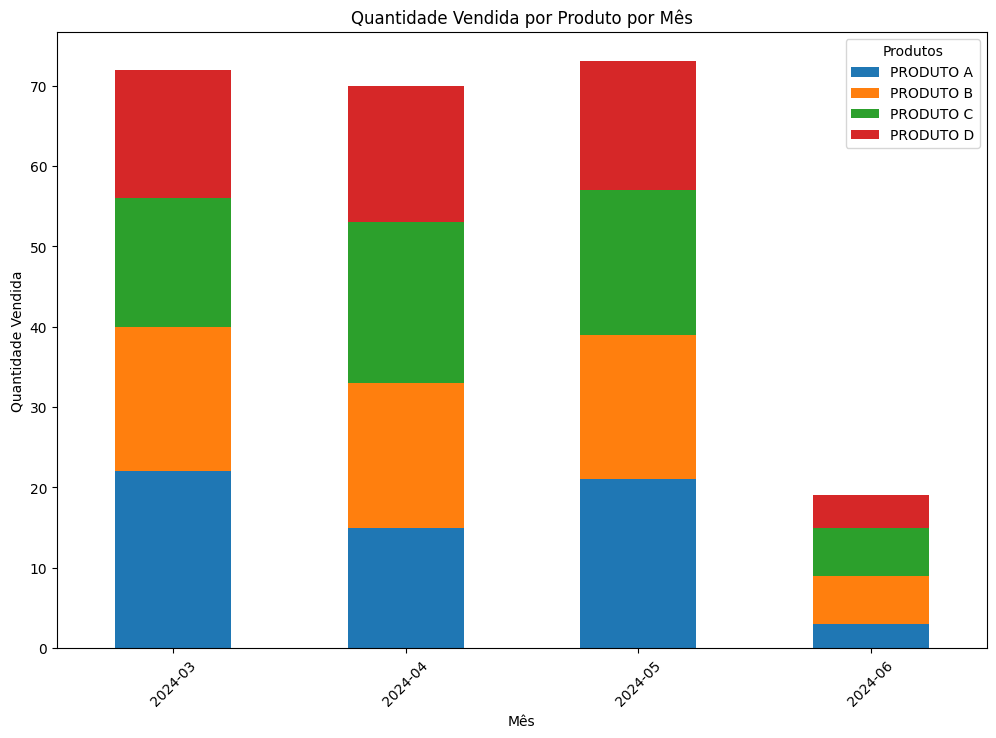

In [63]:
# Plotar as vendas mensais por produto
# Calcular a quantidade total vendida por produto e por mês
monthly_product_sales = df_sales.groupby(['month', 'product_name'])['quantity'].sum().unstack().fillna(0)

print("Quantidade total vendida por produto e por mês:")
print(monthly_product_sales)

ax = monthly_product_sales.plot(kind='bar', stacked=True, figsize=(12, 8), title='Quantidade Vendida por Produto por Mês')
ax.set_xlabel('Mês')
ax.set_ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.legend(title='Produtos')
plt.show()

Quantidade total de produtos vendidos por mês:
month
2024-03    72
2024-04    70
2024-05    73
2024-06    19
Freq: M, Name: quantity, dtype: int64


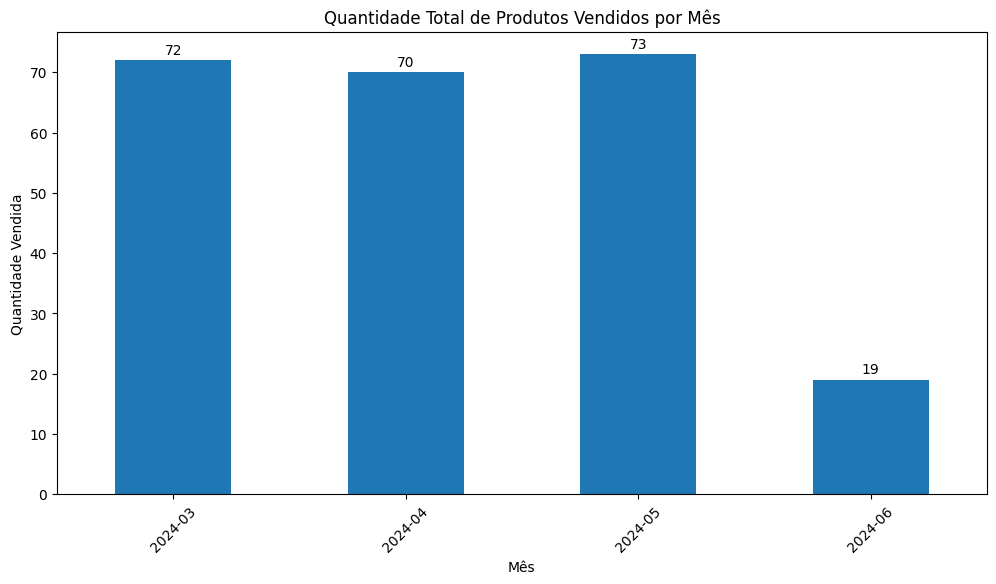

In [64]:
# Plotar a quantidade total de produtos vendidos por mês
# Calcular a quantidade total de produtos vendidos por mês
monthly_total_sales = df_sales.groupby('month')['quantity'].sum()

print("Quantidade total de produtos vendidos por mês:")
print(monthly_total_sales)

ax = monthly_total_sales.plot(kind='bar', figsize=(12, 6), title='Quantidade Total de Produtos Vendidos por Mês')
ax.set_xlabel('Mês')
ax.set_ylabel('Quantidade Vendida')
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, str(int(i.get_height())), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

### Optei em complementar a visualização com o Power BI

## 4. Banco de Dados

In [65]:
# Conexão com o banco de dados
server = 'localhost\SQLEXPRESS'
database = 'master'
driver = 'ODBC Driver 17 for SQL Server'

# String de conexão para autenticação integrada do Windows
connection_string = f'mssql+pyodbc://{server}/{database}?driver={driver}&trusted_connection=yes'

# Crie o engine de conexão
engine = create_engine(connection_string)

# Nome da tabela onde os dados serão inseridos
table_name = 'sales_data'

# Antes de carregar os dados transformo a coluna month para string para ser aceito pelo banco de dados
result_df['month'] = result_df['month'].astype(str)

# Carregar o DataFrame no SQL Server
result_df.to_sql(table_name, con=engine, if_exists='replace', index=False)

print(f"Dados carregados com sucesso na tabela '{table_name}' do banco de dados '{database}'.")

Dados carregados com sucesso na tabela 'sales_data' do banco de dados 'master'.


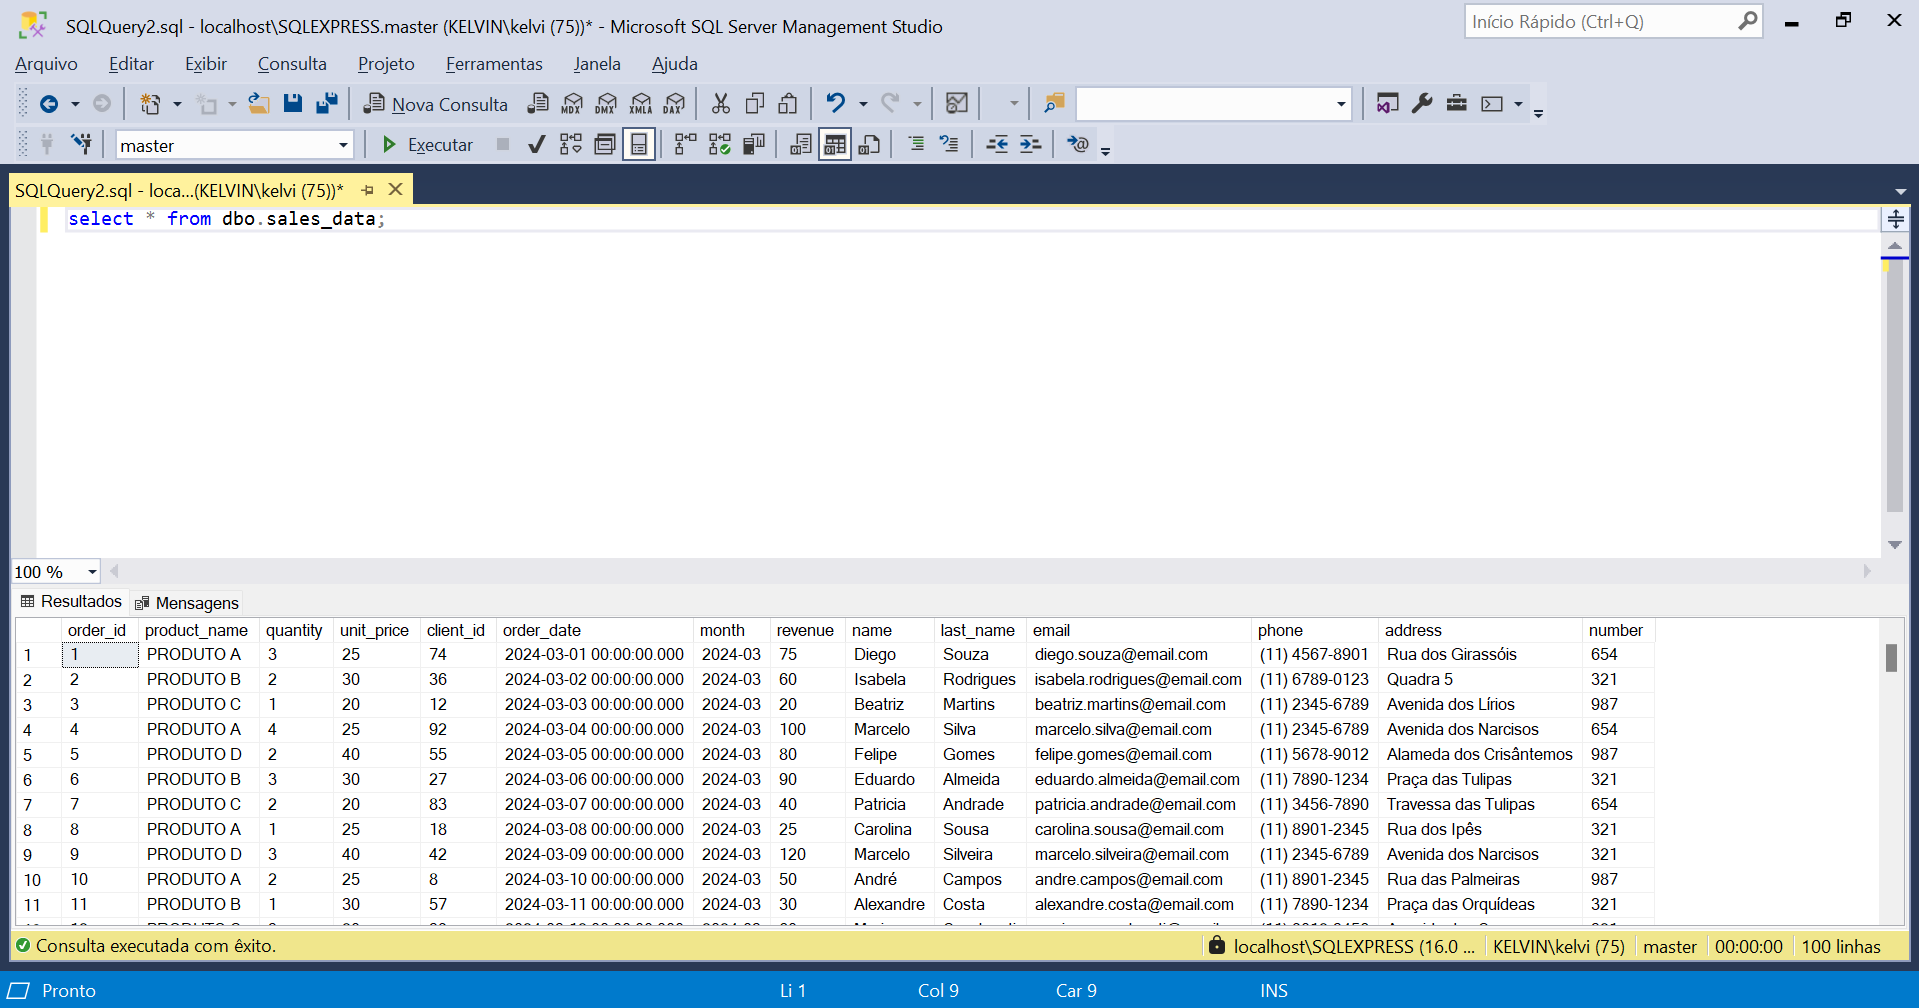

### Quais clientes compraram no dia 14/05/2024?

Resposta: No dia 14/05/2024 o cliente Mateus Almeida comprou 4 "Produtos B" e gastou $120.
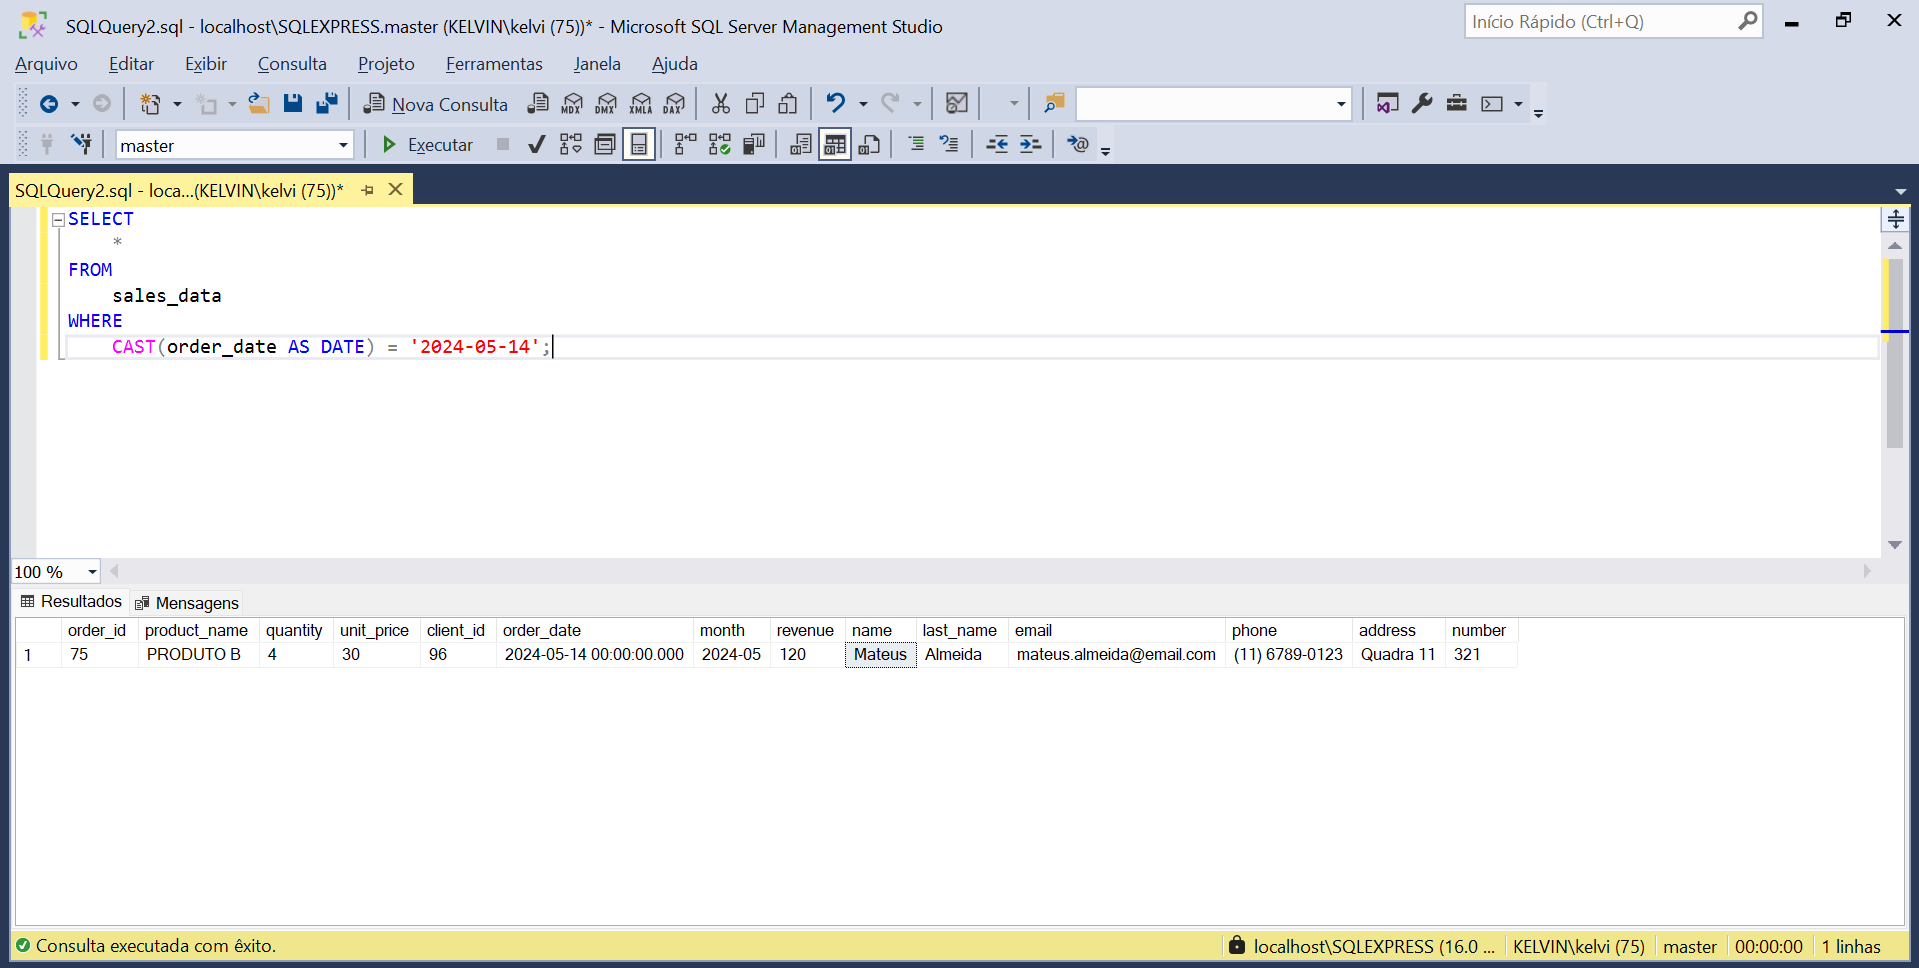

Qual o cliente mais gastou comprando?

Reposta: 15 clientes foram os que mais gastaram comprando. Cada um gastou $120.

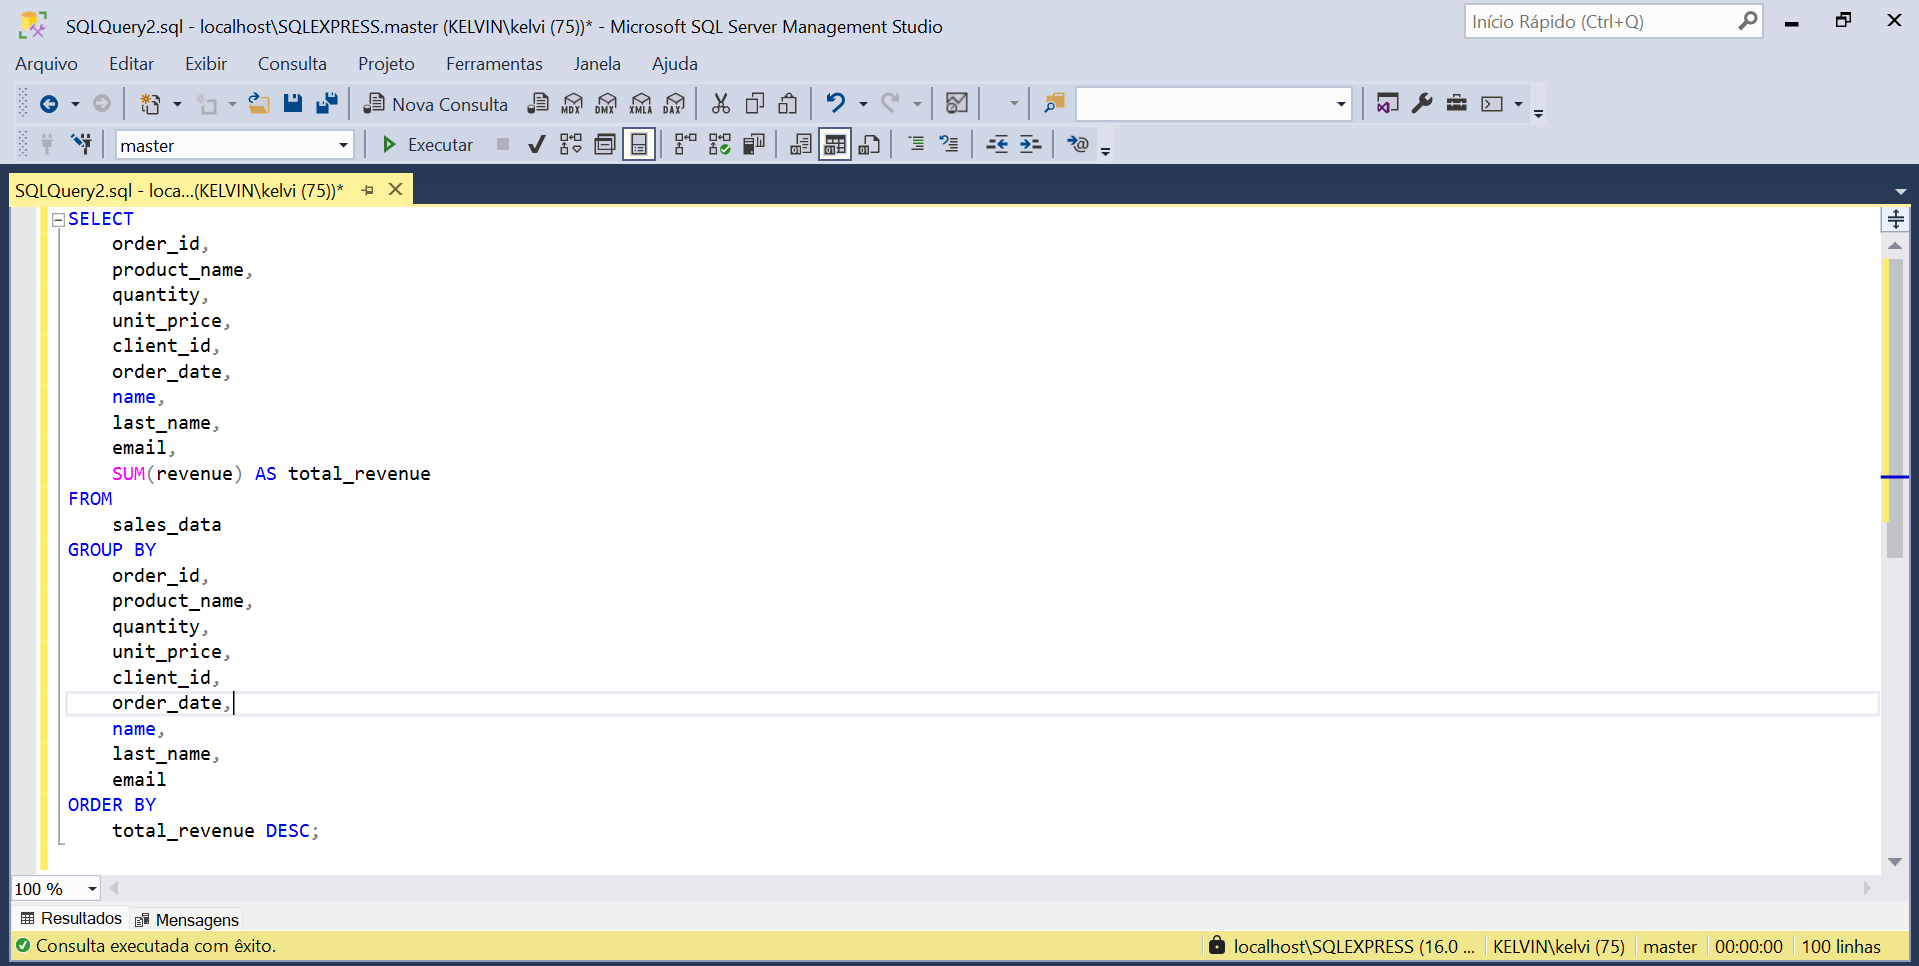

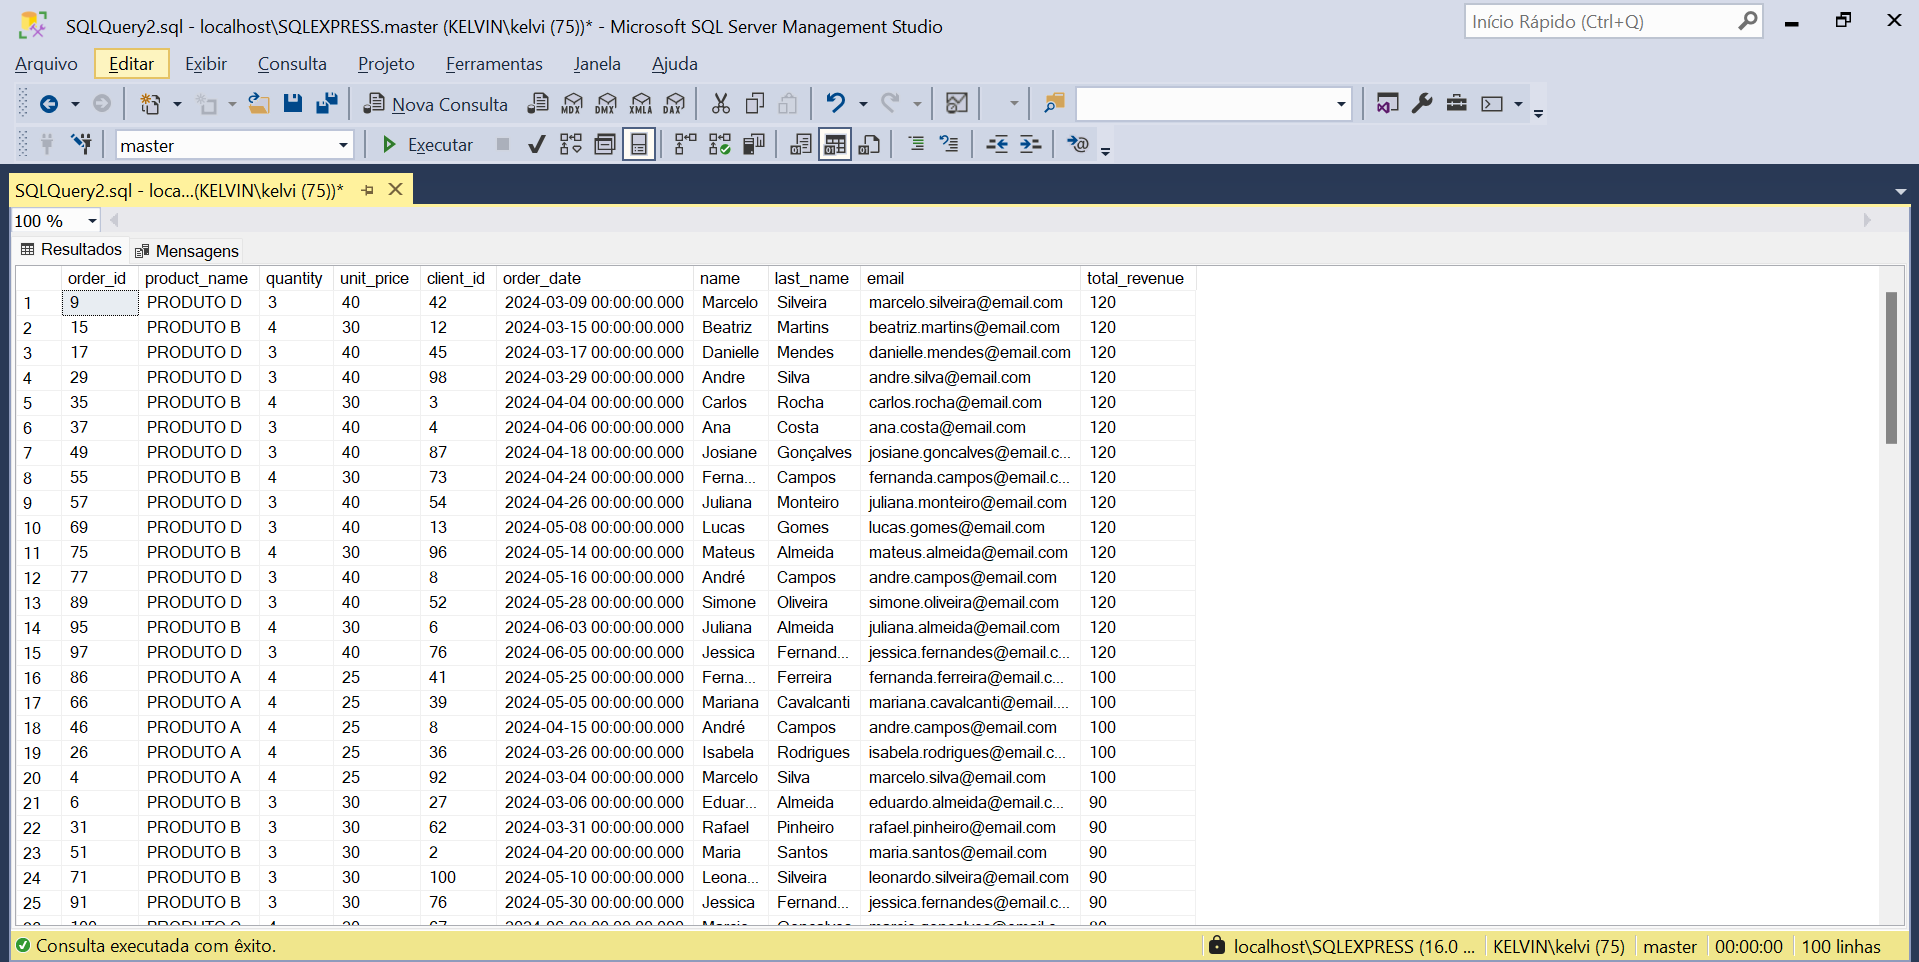